# Analyse de la distribution de la température à Paris le 30 mai 2023
Je n'ai pas beaucoup d'idées de données personnelles que je pourrais utiliser pour cet execice donc je suis allée chercher des données de météo à Paris et vais analyser comment la température a évolué au cours de la journée.

# Source des données
* Le site web d'où sortent ces données: [https://www.timeanddate.com/weather/france/paris/historic](https://www.timeanddate.com/weather/france/paris/historic).
* La méthode de téléchargement: j'ai enregistré au format html, récupéré le dictionnaire javascript au format json dans le code source, puis importé les données dans python pour les reformater en csv comme ceci:

```
import json, csv
text = """copy-paste here the json dictionnary taken from html source code"""
my_data = json.loads(text)
csv_columns = ['date','ts','ds','icon','desc','temp','templow','baro','wind','wd','hum']
my_data2 = [{k:d[k] for k in csv_columns} for d in my_data['detail']]
csv_file = "temps_Paris_30_05_2023.csv"
try:
    with open(csv_file, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader()
    for data in my_data2:
        writer.writerow(data)
except IOError:
    print("I/O error")
```

On peut jeter un coup d'oeil à ce fichier:

In [2]:
%load_ext rpy2.ipython

In [21]:
%%sh
head temps_Paris_30_05_2023.csv

date,ts,ds,icon,desc,temp,templow,baro,wind,wd,hum
1684173600000.0,18:00,"Monday, 15 May 2023, 18:00 — 00:00",14,Passing clouds.,11,9,1019,15,0,85
1684195200000.0,00:00,"Tuesday, 16 May 2023, 00:00 — 06:00",14,Passing clouds.,9,5,1021,13,350,90
1684216800000.0,06:00,"Tuesday, 16 May 2023, 06:00 — 12:00",2,Scattered clouds.,12,5,1022,19,350,79
1684238400000.0,12:00,"Tuesday, 16 May 2023, 12:00 — 18:00",2,Passing clouds.,16,12,1023,22,10,51
1684260000000.0,18:00,"Tuesday, 16 May 2023, 18:00 — 00:00",2,Passing clouds.,16,11,1024,16,10,57
1684281600000.0,00:00,"Wednesday, 17 May 2023, 00:00 — 06:00",13,Clear.,11,7,1025,8,350,84
1684303200000.0,06:00,"Wednesday, 17 May 2023, 06:00 — 12:00",2,Passing clouds.,14,7,1027,14,50,77
1684324800000.0,12:00,"Wednesday, 17 May 2023, 12:00 — 18:00",2,Passing clouds.,17,14,1026,21,40,51
1684346400000.0,18:00,"Wednesday, 17 May 2023, 18:00 — 00:00",2,Passing clouds.,16,12,1026,17,30,56


In [18]:
import pandas

In [22]:
import pandas
df = pandas.read_csv('temps_Paris_30_05_2023.csv')
print(df)

            date     ts                                     ds  icon  \
0   1.684174e+12  18:00     Monday, 15 May 2023, 18:00 — 00:00    14   
1   1.684195e+12  00:00    Tuesday, 16 May 2023, 00:00 — 06:00    14   
2   1.684217e+12  06:00    Tuesday, 16 May 2023, 06:00 — 12:00     2   
3   1.684238e+12  12:00    Tuesday, 16 May 2023, 12:00 — 18:00     2   
4   1.684260e+12  18:00    Tuesday, 16 May 2023, 18:00 — 00:00     2   
5   1.684282e+12  00:00  Wednesday, 17 May 2023, 00:00 — 06:00    13   
6   1.684303e+12  06:00  Wednesday, 17 May 2023, 06:00 — 12:00     2   
7   1.684325e+12  12:00  Wednesday, 17 May 2023, 12:00 — 18:00     2   
8   1.684346e+12  18:00  Wednesday, 17 May 2023, 18:00 — 00:00     2   
9   1.684368e+12  00:00   Thursday, 18 May 2023, 00:00 — 06:00    13   
10  1.684390e+12  06:00   Thursday, 18 May 2023, 06:00 — 12:00     2   
11  1.684411e+12  12:00   Thursday, 18 May 2023, 12:00 — 18:00     2   
12  1.684433e+12  18:00   Thursday, 18 May 2023, 18:00 — 00:00  

# Analyse des données

## Informations qu'on a

In [43]:
list(df.columns)

['date',
 'ts',
 'ds',
 'icon',
 'desc',
 'temp',
 'templow',
 'baro',
 'wind',
 'wd',
 'hum']

La plage horaire/date qu'on a à disposition va du

In [39]:
import datetime
datetime.datetime.fromtimestamp(df['date'].min()/1000).strftime('%c')

'Mon 15 May 2023 06:00:00 PM '

au

In [40]:
datetime.datetime.fromtimestamp(df['date'].max()/1000).strftime('%c')

'Tue 30 May 2023 06:00:00 PM '

## Température
En moyenne, à Paris, il a fait une température en degrés Celsius de :

In [60]:
df['temp'].mean()

1684173600000

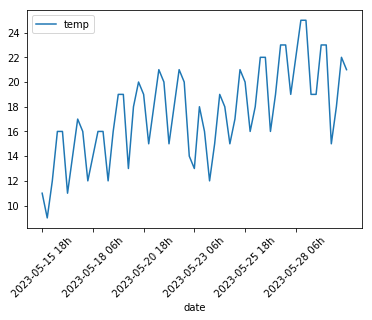

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot(x='date',y='temp')
ax = plt.subplot()
xticks = list(range(int(round(df.date.min(),0)),int(round(df.date.max(),0)),int(round((df.date.max()-df.date.min())/6.,0))))
xtick_labels = [datetime.datetime.fromtimestamp(d/1000).strftime('%Y-%m-%d %Hh') for d in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, rotation=45)
plt.show()

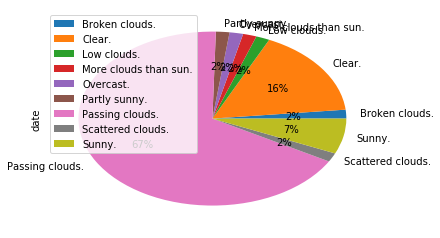

In [86]:
%matplotlib inline
df.groupby(df['desc']).count().plot(kind='pie', y='date', autopct='%1.0f%%')
plt.show()